---
layout: page
title: Programming with Python
subtitle: Creating Functions
minutes: 30
---
> ## Learning Objectives
>
> *   Define a function that takes parameters.
> *   Return a value from a function.
> *   Test and debug a function.
> *   Set default values for function parameters.
> *   Explain why we should divide programs into small, single-purpose functions.

At this point,
we've written code to draw some interesting features in our inflammation data,
loop over all our data files to quickly draw these plots for each of them,
and have Python make decisions based on what it sees in our data.
But, our code is getting pretty long and complicated;
what if we had thousands of datasets,
and didn't want to generate a figure for every single one?
Commenting out the figure-drawing code is a nuisance.
Also, what if we want to use that code again,
on a different dataset or at a different point in our program?
Cutting and pasting it is going to make our code get very long and very repetitive,
very quickly.
We'd like a way to package our code so that it is easier to reuse,
and Python provides for this by letting us define things called 'functions' -
a shorthand way of re-executing longer pieces of code.

Import required packages

In [76]:
import numpy 
import matplotlib.pyplot

Let's start by defining a function `fahr_to_kelvin` that converts temperatures from Fahrenheit to Kelvin:

In [77]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5/9)) + 273.15

The function definition opens with the word `def`,
which is followed by the name of the function
and a parenthesized list of parameter names.
The [body](reference.html#function-body) of the function --- the
statements that are executed when it runs --- is indented below the definition line.

When we call the function,
the values we pass to it are assigned to those variables
so that we can use them inside the function.
Inside the function,
we use a [return statement](reference.html#return-statement) to send a result back to whoever asked for it.

Let's try running our function.
Calling our own function is no different from calling any other function:

In [78]:
print('freezing point of water:', fahr_to_kelvin(32))
print('boiling point of water:', fahr_to_kelvin(212))

freezing point of water: 273.15
boiling point of water: 373.15


We've successfully called the function that we defined,
and we have access to the value that we returned.

## Composing Functions

Now that we've seen how to turn Fahrenheit into Kelvin,
it's easy to turn Kelvin into Celsius:

In [79]:
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

print('absolute zero in Celsius:', kelvin_to_celsius(0.0))

absolute zero in Celsius: -273.15


What about converting Fahrenheit to Celsius?
We could write out the formula,
but we don't need to.
Instead,
we can [compose](reference.html#compose) the two functions we have already created:

In [80]:
def fahr_to_celsius(temp_f):
    temp_k = fahr_to_kelvin(temp_f)
    result = kelvin_to_celsius(temp_k)
    return result

print('freezing point of water in Celsius:', fahr_to_celsius(32.0))

freezing point of water in Celsius: 0.0


This is our first taste of how larger programs are built:
we define basic operations,
then combine them in ever-large chunks to get the effect we want.
Real-life functions will usually be larger than the ones shown here --- typically half a dozen to a few dozen lines --- but
they shouldn't ever be much longer than that,
or the next person who reads it won't be able to understand what's going on.

## Tidying up

Now that we know how to wrap bits of code up in functions,
we can make our inflammation analysis easier to read and easier to reuse.
First, let's make an `analyze` function that generates our plots:

In [81]:
def analyze(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(data.mean(axis=0))

    axes2.set_ylabel('max')
    axes2.plot(data.max(axis=0))

    axes3.set_ylabel('min')
    axes3.plot(data.min(axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

Try it: 

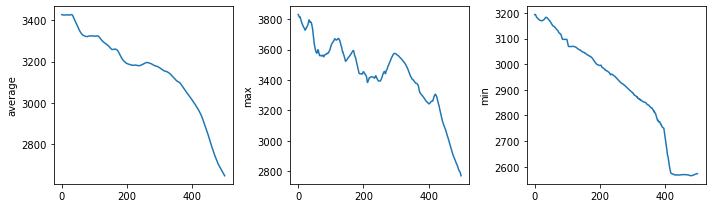

In [82]:
filename ='data/topo.asc'
analyze(filename)

and another function called `detect_problems` that checks for those systematics
we noticed:

In [83]:
def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    if data.max(axis=0)[0] == 0 and data.max(axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif data.min(axis=0).sum() == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')

Try it: 

In [84]:
filename ='data/topo.asc'
detect_problems(filename)

Seems OK!


## Testing and Documenting

Once we start putting things in functions so that we can re-use them,
we need to start testing that those functions are working correctly.
To see how to do this,
let's write a function to center a dataset around a particular value:

In [85]:
def center(data, desired):
    return (data - data.mean()) + desired

We could test this on our actual data,
but since we don't know what the values ought to be,
it will be hard to tell if the result was correct.
Instead,
let's use NumPy to create a matrix of 0's
and then center that around 3:

In [86]:
z = numpy.zeros((2,2))
print(center(z, 3))

[[3. 3.]
 [3. 3.]]


That looks right,
so let's try `center` on our real data:

In [87]:
filename ='data/topo.asc'

data = numpy.loadtxt(fname=filename, delimiter=',')
print(center(data, 0))

[[  45.21743593   44.50133593   43.53673593 ... -570.29236407
  -568.18486407 -564.51376407]
 [  44.70893593   43.90253593   42.78853593 ... -570.92246407
  -568.70496407 -565.82066407]
 [  44.37513593   43.29803593   42.09713593 ... -571.78886407
  -569.80576407 -567.58916407]
 ...
 [ 171.52923593  181.16053593  189.69373593 ... -372.80256407
  -384.29816407 -391.24866407]
 [ 171.46063593  181.40913593  191.87463593 ... -378.28716407
  -387.90856407 -393.96616407]
 [ 173.06073593  182.90883593  194.51263593 ... -383.85556407
  -391.09746407 -396.93396407]]


It's hard to tell from the default output whether the result is correct,
but there are a few simple tests that will reassure us:

In [88]:
print('original min, mean, and max are:', data.min(), data.mean(), data.max())
centered = center(data, 0)
print('min, mean, and and max of centered data are:', centered.min(), centered.mean(), centered.max())

original min, mean, and max are: 2565.0293 3153.6216640708008 3831.2617
min, mean, and and max of centered data are: -588.5923640708006 -7.557682693004609e-13 677.6400359291993


That seems almost right:
the original mean was about ca. 3153.6,
so the lower bound from zero is now about 3153.6-2565.0293.
The mean of the centered data isn't quite zero --- we'll explore why not in the challenges --- but it's pretty close.
We can even go further and check that the standard deviation hasn't changed:

In [89]:
print('std dev before and after:', data.std(), centered.std())

std dev before and after: 234.53903692994228 234.53903692994228


Those values look the same,
but we probably wouldn't notice if they were different in the sixth decimal place.
Let's do this instead:

In [90]:
print('difference in standard deviations before and after:', data.std() - centered.std())

difference in standard deviations before and after: 0.0


Again,
the difference is very small.
It's still possible that our function is wrong,
but it seems unlikely enough that we should probably get back to doing our analysis.
We have one more task first, though:
we should write some [documentation](reference.html#documentation) for our function
to remind ourselves later what it's for and how to use it.

The usual way to put documentation in software is to add [comments](reference.html#comment) like this:

In [91]:
# center(data, desired): return a new array containing the original data centered around the desired value.
def center(data, desired):
    return (data - data.mean()) + desired

There's a better way, though.
If the first thing in a function is a string that isn't assigned to a variable,
that string is attached to the function as its documentation:

In [92]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.'''
    return (data - data.mean()) + desired

This is better because we can now ask Python's built-in help system to show us the documentation for the function:

In [93]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.



In [94]:
?center

A string like this is called a [docstring](reference.html#docstring).
We don't need to use triple quotes when we write one,
but if we do,
we can break the string across multiple lines:

In [95]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]



## Defining Defaults

We have passed parameters to functions in two ways:
directly, as in `type(data)`,
and by name, as in `numpy.loadtxt(fname='something.csv', delimiter=',')`.
In fact,
we can pass the filename to `loadtxt` without the `fname=`:

In [96]:
numpy.loadtxt('data/topo.asc', delimiter=',')

array([[3198.8391, 3198.123 , 3197.1584, ..., 2583.3293, 2585.4368,
        2589.1079],
       [3198.3306, 3197.5242, 3196.4102, ..., 2582.6992, 2584.9167,
        2587.801 ],
       [3197.9968, 3196.9197, 3195.7188, ..., 2581.8328, 2583.8159,
        2586.0325],
       ...,
       [3325.1509, 3334.7822, 3343.3154, ..., 2780.8191, 2769.3235,
        2762.373 ],
       [3325.0823, 3335.0308, 3345.4963, ..., 2775.3345, 2765.7131,
        2759.6555],
       [3326.6824, 3336.5305, 3348.1343, ..., 2769.7661, 2762.5242,
        2756.6877]])

but we still need to say `delimiter=`:

What happens if you enter the following statement?  
 ~~~ {.python}
 numpy.loadtxt('data/topo.asc', ',')
 ~~~

To understand what's going on,
and make our own functions easier to use,
let's re-define our `center` function like this:

In [97]:
def center(data, desired=0.0):
    '''Return a new array containing the original data centered around the desired value (0 by default).
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

The key change is that the second parameter is now written `desired=0.0` instead of just `desired`.
If we call the function with two arguments,
it works as it did before:

In [98]:
test_data = numpy.zeros((2, 2))
print(center(test_data, 3))

[[3. 3.]
 [3. 3.]]


But we can also now call it with just one parameter,
in which case `desired` is automatically assigned the [default value](reference.html#default-value) of 0.0:

In [99]:
more_data = 5 + numpy.zeros((2, 2))
print('data before centering:')
print(more_data)
print('centered data:')
print(center(more_data))

data before centering:
[[5. 5.]
 [5. 5.]]
centered data:
[[0. 0.]
 [0. 0.]]


This is handy:
if we usually want a function to work one way,
but occasionally need it to do something else,
we can allow people to pass a parameter when they need to
but provide a default to make the normal case easier.
The example below shows how Python matches values to parameters:

In [100]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('no parameters:')
display()
print('one parameter:')
display(55)
print('two parameters:')
display(55, 66)

no parameters:
a: 1 b: 2 c: 3
one parameter:
a: 55 b: 2 c: 3
two parameters:
a: 55 b: 66 c: 3


As this example shows,
parameters are matched up from left to right,
and any that haven't been given a value explicitly get their default value.
We can override this behavior by naming the value as we pass it in:

In [101]:
print('only setting the value of c')
display(c=77)

only setting the value of c
a: 1 b: 2 c: 77


With that in hand,
let's look at the help for `numpy.loadtxt`:

In [102]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
        The char

There's a lot of information here,
but the most important part is the first couple of lines:

~~~ {.output}
loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None,
        unpack=False, ndmin=0)
~~~

This tells us that `loadtxt` has one parameter called `fname` that doesn't have a default value,
and eight others that do.
If we call the function like this (try):
 ~~~ {.python}
 numpy.loadtxt('data/topo.asc', ',')
 ~~~

then the filename is assigned to `fname` (which is what we want),
but the delimiter string `','` is assigned to `dtype` rather than `delimiter`,
because `dtype` is the second parameter in the list. However ',' isn't a known `dtype` so
our code produced an error message when we tried to run it.
When we call `loadtxt` we don't have to provide `fname=` for the filename because it's the
first item in the list, but if we want the ',' to be assigned to the variable `delimiter`,
we *do* have to provide `delimiter=` for the second parameter since `delimiter` is not
the second parameter in the list.

 ## Test your skills 01: Combining strings 

 "Adding" two strings produces their concatenation:
 `'a' + 'b'` is `'ab'`.
 Write a function called `fence` that takes two parameters called `original` and `wrapper`
 and returns a new string that has the wrapper character at the beginning and end of the original.
 A call to your function should look like this:

 ~~~ {.python}
 print(fence('name', '*'))
 ~~~
 ~~~ {.output}
 *name*
 ~~~

## Test your skills 02: Selecting characters from strings 

 If the variable `s` refers to a string,
 then `s[0]` is the string's first character
 and `s[-1]` is its last.
 Write a function called `outer`
 that returns a string made up of just the first and last characters of its input.
 A call to your function should look like this:

 ~~~ {.python}
 print(outer('helium'))
 ~~~
 ~~~ {.output}
 hm
 ~~~

## Test your skills 03 : Rescaling an array 

 Write a function `rescale` that takes an array as input
 and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0.
 (Hint: If $L$ and $H$ are the lowest and highest values in the original array,
 then the replacement for a value $v$ should be $(v-L) / (H-L)$.)

## Test your skills 04: Testing and documenting your function 

 Run the commands `help(numpy.arange)` and `help(numpy.linspace)`
 to see how to use these functions to generate regularly-spaced values,
 then use those values to test your `rescale` function.
 Once you've successfully tested your function,
 add a docstring that explains what it does.
 

## Test your skills 05: Defining defaults 

 Rewrite the `rescale` function so that it scales data to lie between 0.0 and 1.0 by default,
 but will allow the caller to specify lower and upper bounds if they want.
 Compare your implementation to your neighbor's:
 do the two functions always behave the same way?

## Test your skills 06: Variables inside and outside functions

 What does the following piece of code display when run - and why?

 ~~~ {.python}
 f = 0
 k = 0

 def f2k(f):
   k = ((f-32)*(5.0/9.0)) + 273.15
   return k

 f2k(8)
 f2k(41)
 f2k(32)

 print(k)
 ~~~